<a href="https://colab.research.google.com/github/Bokocki/135UM-Homework/blob/main/Homework03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Homework Assignment: Optimizing the Classification Threshold in Logistic Regression**

-------------------------------

In this assignment, you will explore the concept of **classification thresholds** in **Logistic Regression** and investigate whether the commonly used threshold of **0.5** is always the optimal choice. To complete this assignment, you will need to conduct **additional reading** on **ROC curves** and the **AUC metric**, beyond the materials covered in class.

This exercise focuses on the **importance of threshold selection** and how it impacts model performance based on different evaluation criteria.



## **The Objective**

**Is a 0.5 threshold always the best choice in Logistic Regression?**

- Analyze if the standard threshold of **0.5** always yields the most desirable results in various scenarios.
- Investigate alternative thresholds and how they can improve model performance depending on the problem context.



## **Helper Questions**

1. **Would a different threshold yield better results?**  
   - How does shifting the threshold affect the **trade-off between sensitivity and specificity**?

2. **How do you define "better" results?**  
   - Is **higher specificity** more valuable than **higher sensitivity** in certain contexts? Or maybe the other way around?
   - Does the **best threshold** depend on the task? (discuss cases like *disease detection* vs. *spam filtering*)

3. **How does a ROC curve help in this process?**  
   - Learn how to use a **ROC curve** to visualize the trade-off between **True Positive Rate (Sensitivity)** and **False Positive Rate (1 - Specificity)**.

4. **How do you select the optimal threshold using the ROC curve?**  
   - Discuss strategies to select a threshold depending on the specific task at hand and the acceptable **trade-off between sensitivity and specificity**.

5. **What is the AUC metric and how is it useful?**  
   - Define **AUC (Area Under the Curve)** and discuss its role in evaluating the overall performance of a classifier.



## **Tasks & Deliverables**

1. **Colab Notebook**
   - Select a suitable classification 2-class dataset.
   - Divide the dataset into three parts: **train**, **validation**, and **test**.
   - Train the **Logistic Regression** model on the **training** set.
   - Use the **validation** set to:
     - Plot the **ROC curve**.
     - Calculate the **AUC**.
     - Determine the **optimal threshold** using the ROC curve for your dataset.
   - Apply the selected threshold to the **test** set to evaluate final model performance using metrics like:
     - **Accuracy**
     - **Precision & Recall**
     - **F1-Score**
     - **Specificity & Sensitivity**

2. **Answer the Questions:**
   - Use markdown cells to provide explanations.
   - Answer all helper questions with supporting evidence from your plots and results.

3. **Visualizations:**
   - **ROC curve** based on the **validation** set with threshold points marked.
   - Highlight the **optimal threshold** on the ROC curve.

4. **Publish on GitHub**  
   - Place the Colab notebook in your **GitHub repository** for this course.
   - In your repository’s **README**, add a **link** to the notebook and also include an **“Open in Colab”** badge at the top of the notebook so it can be launched directly from GitHub.




# Rozwiązanie pracy domowej

## Baza danych

Dane wzięte są z platformy kaggle, [Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction/data?select=heart.csv). Zbiór zawiera zmienne związane ze zdrowiem kardiologicznym, takie jak wiek, ciśnienie krwi, poziom cholesterolu itp. Przewidywaną zmienną jest obecność choroby serca, która jest zmienną binarną: 1 oznacza, że pacjent ma chorobę serca, a 0 oznacza, że jej nie ma. Zbiór jest odpowiedni do klasyfikacji binarnej oraz zawiera dużo obserwacji do przeprowadzenia analizy.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_curve,
    roc_auc_score,
    confusion_matrix,
)
from sklearn.preprocessing import StandardScaler

# Load the dataset
url = 'https://raw.githubusercontent.com/Bokocki/135UM-Homework/refs/heads/main/heart.csv'
heart_data = pd.read_csv(url)

# Display the first few rows of the dataset
print(heart_data.head())

# Check the distribution of the target variable
print("\nTarget distribution:\n", heart_data['HeartDisease'].value_counts())

   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  

Target distribution:
 HeartDisease
1    508
0    410
Name: count, dtype: int64


## Szacowanie modelu

Podzieliłem dane na trzy części: zbiór treningowy (60%), walidacyjny (20%) i testowy (20%). Zbiór treningowy służy do uczenia modelu, walidacyjny do dostrojenia parametrów (np. wyboru progu klasyfikacji), a zbiór testowy do ostatecznej oceny modelu. Pozwoli to uniknąć przetrenowania modelu.

In [2]:
# Separate features (X) and target (y)
X = heart_data.drop('HeartDisease', axis=1)
y = heart_data['HeartDisease']

# Convert categorical variables into dummy/indicator variables (one-hot encoding)
X = pd.get_dummies(X, drop_first=True)

# Split the dataset into train, validation, and test sets (60% train, 20% validation, 20% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Scaling the features to help with convergence of the LogisticRegression
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

# Initialize and train the Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Dokładność modelu

Optymalny próg:  0.49


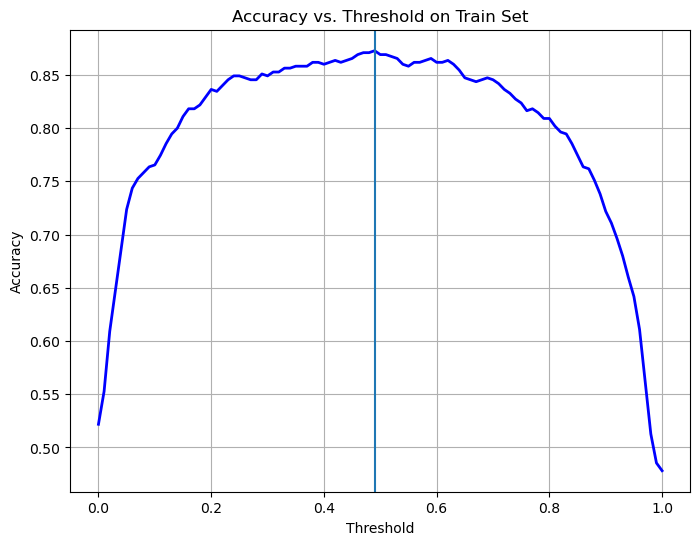

In [3]:
# Predict probabilities on the validation set
y_train_probs = model.predict_proba(X_train)[:, 1]  # Probabilities for the heart disease class

# Define a range of thresholds
thresholds = np.arange(0, 1.01, 0.01)

# Calculate accuracy for each threshold
accuracies = []
for threshold in thresholds:
    y_train_pred = (y_train_probs >= threshold).astype(int)
    accuracies.append(accuracy_score(y_train, y_train_pred))

# Find threshold for which accuracy is highest
optimal_threshold = thresholds[accuracies.index(max(accuracies))]
print("Optymalny próg: ", optimal_threshold)

# Plot accuracy vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, color='blue', lw=2)
plt.axvline(x=optimal_threshold)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold on Train Set')
plt.grid(True)
plt.show()

Optymalny próg:  0.27


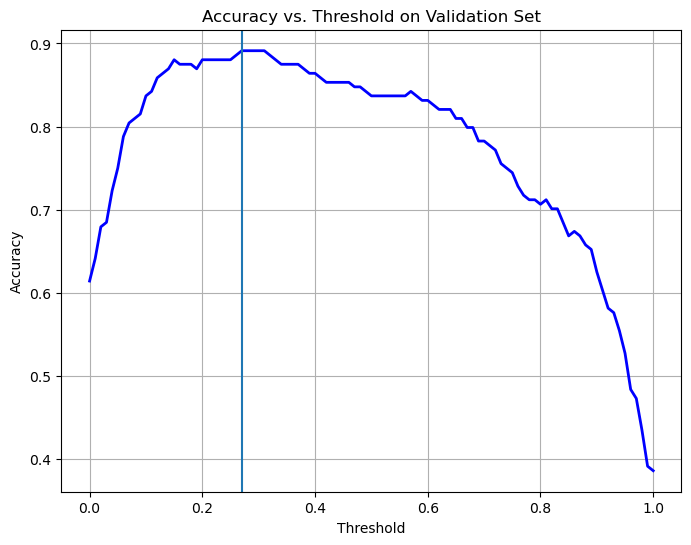

In [4]:
# Predict probabilities on the validation set
y_val_probs = model.predict_proba(X_val)[:, 1]  # Probabilities for the heart disease class

# Define a range of thresholds
thresholds = np.arange(0, 1.01, 0.01)

# Calculate accuracy for each threshold
accuracies = []
for threshold in thresholds:
    y_val_pred = (y_val_probs >= threshold).astype(int)
    accuracies.append(accuracy_score(y_val, y_val_pred))

# Find threshold for which accuracy is highest
optimal_threshold = thresholds[accuracies.index(max(accuracies))]
print("Optymalny próg: ", optimal_threshold)

# Plot accuracy vs. threshold
plt.figure(figsize=(8, 6))
plt.plot(thresholds, accuracies, color='blue', lw=2)
plt.axvline(x=optimal_threshold)
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold on Validation Set')
plt.grid(True)
plt.show()

Dokładność modelu, czyli proporcja poprawnie przewidzianych klas, jest najwyższa dla progu ok. 0.5 na zbiorze treningowym. Jest to zgodne z teorią modelu logistycznego. Na zbiorze walidacyjnym dokładność jest największa dla niższego progu, ok. 0.3, wynika to z losowości podziału danych, widocznie trafiła się niereprezentacyjna próbka. W zależności od wybranego nasienia losowości wyniki są inne, z reguły bliższe teoretycznej wartości 0.5. Pod tym względem wartość progu 0.5 niekoniecznie jest z automatu najlepszą wartością, jeśli chcemy mieć jak największą moc predykcyjną modelu, ale przy reprezentatywnych podpróbkach teoretycznie powinien to być najlepszy próg pod względem dokładności modelu.

## Krzywa ROC

0.12098330159858561


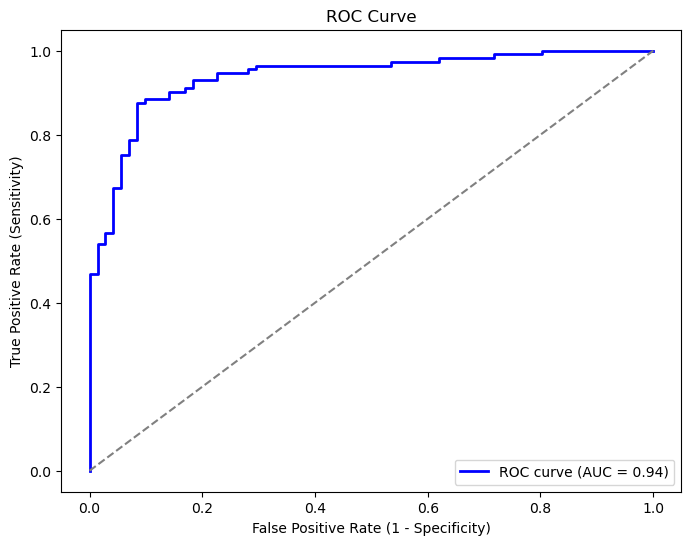

In [5]:
# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_val, y_val_probs)
roc_auc = roc_auc_score(y_val, y_val_probs)

optimal_threshold = thresholds[np.argmin(np.abs(fpr - 0.3))]
print(optimal_threshold)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

Krzywa ROC ilustruje kompromis między czułością (*sensitivity*) a *false positive rate* (1 - *specificity*) dla różnych progów klasyfikacji. Zwiększenie progu zmniejsza liczbę *false positives*, ale kosztem zmniejszenia czułości. Krzywa ROC pomaga w wyborze optymalnego progu, który zależy od konkretnego problemu. Dla ustalenia uwagi, przy progu 0 każda obserwacja jest uznana za pozytywną i mamy wtedy *true positive rate* równy 1, ale także *false positive rate* równy 1 (prawy górny róg na krzywej ROC). Dla progu 1 jesteśmy w lewym dolnym rogu krzywej ROC, tzn. na pewno nie mamy *false positives*, ale też żadnej obserwacji pozytywnej dobrze nie przewidzimy, tzn. *true positive rate* jest też 0. Zmiana progu odpowiada przesuwaniu się po krzywej ROC.

Wybór odpowiedniego progu klasyfikacji zależy od celu modelowania. Jeśli celem jest maksymalizacja dokładności (*accuracy*) bez rozróżnienia na błędy typu *false positive* i *false negative*, próg można wybrać na podstawie zbioru walidacyjnego, tak aby maksymalizować dokładność. Jeśli podpróbki treningowe, walidacyjne i testowe są reprezentacyjne, to próg 0.5 jest teoretycznie najlepszy.

W wielu przypadkach koszty błędów typu *false positive* i *false negative* nie są równe. Na przykład, w przypadku udzielania pożyczek, znacznie bardziej kosztowne jest udzielenie pożyczki klientowi, który jej nie spłaci, niż odmówienie pożyczki klientowi, który by ją spłacił. Podobnie w przypadku wykrywania chorób serca, znacznie ważniejsze jest wykrycie wszystkich przypadków choroby (wysoka czułość), nawet jeśli oznacza to skierowanie na dodatkowe badania osób zdrowych (wyższy *false positive rate*). W takim przypadku warto obniżyć próg klasyfikacji, aby zwiększyć czułość (*true positive rate*), nawet kosztem niższej dokładności. Na krzywej ROC odpowiada to przesunięciu w kierunku wyższego *true positive rate*, ale również wyższego *false positive rate*.

W praktyce optymalny próg można wybrać na podstawie analizy krzywej ROC, szukając punktu, w którym dalsze obniżenie progu powoduje niewielki przyrost czułości, ale znaczący wzrost *false positive rate*. W naszym przypadku odpowiada to false positive rate na poziomie około 0.3, co przekłada się na próg ok. 0.121. Ten próg jest niższy niż domyślny próg 0.5 oraz niższy niż próg 0.3 wybrany na podstawie walidacji. Choć całkowita dokładność modelu jest niższa, zyskujemy wyższą czułość, co jest kluczowe w przypadku wykrywania chorób serca.

AUC (*Area Under the Curve*) to pole pod krzywą ROC i jest miarą jakości modelu niezależną od wyboru progu. Wartość AUC interpretuje się jako prawdopodobieństwo, że model przypisze wyższe prawdopodobieństwo bycia pozytywnym przypadkiem do losowo wybranej obserwacji pozytywnej niż do losowo wybranej obserwacji negatywnej. Im lepszy model, tym krzywa ROC jest bliżej punktu (0,1), a AUC jest bliższe 1. Model, który zachowuje się jak rzut monetą, ma krzywą ROC w postaci linii prostej od (0,0) do (1,1), a jego AUC wynosi 0.5. AUC jest przydatne przy porównywaniu modeli, ponieważ im wyższe AUC, tym generalnie lepszy model.

## Testowanie wydajności modelu

In [6]:
# Apply the optimal threshold chosen by ROC curve to the test set
y_test_probs = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= optimal_threshold).astype(int)

# Evaluate the model on the test set
print("\nTest Set Metrics for ROC Threshold:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Sensitivity:", confusion_matrix(y_test, y_test_pred)[1,1]/sum(confusion_matrix(y_test, y_test_pred)[1,:]))
print("Specificity:", confusion_matrix(y_test, y_test_pred)[0,0]/sum(confusion_matrix(y_test, y_test_pred)[0,:]))

# Apply the optimal threshold chosen by validation to the test set
y_test_probs = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= 0.3).astype(int)

# Evaluate the model on the test set
print("\nTest Set Metrics for Validation Threshold:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Sensitivity:", confusion_matrix(y_test, y_test_pred)[1,1]/sum(confusion_matrix(y_test, y_test_pred)[1,:]))
print("Specificity:", confusion_matrix(y_test, y_test_pred)[0,0]/sum(confusion_matrix(y_test, y_test_pred)[0,:]))

# Apply the 0.5 threshold to the test set
y_test_probs = model.predict_proba(X_test)[:, 1]
y_test_pred = (y_test_probs >= 0.5).astype(int)

# Evaluate the model on the test set
print("\nTest Set Metrics for 0.5 Threshold:")
print("Accuracy:", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred))
print("Recall:", recall_score(y_test, y_test_pred))
print("F1-Score:", f1_score(y_test, y_test_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_test_pred))
print("Sensitivity:", confusion_matrix(y_test, y_test_pred)[1,1]/sum(confusion_matrix(y_test, y_test_pred)[1,:]))
print("Specificity:", confusion_matrix(y_test, y_test_pred)[0,0]/sum(confusion_matrix(y_test, y_test_pred)[0,:]))


Test Set Metrics for ROC Threshold:
Accuracy: 0.8532608695652174
Precision: 0.8091603053435115
Recall: 0.9814814814814815
F1-Score: 0.8870292887029289
Confusion Matrix:
 [[ 51  25]
 [  2 106]]
Sensitivity: 0.9814814814814815
Specificity: 0.6710526315789473

Test Set Metrics for Validation Threshold:
Accuracy: 0.8967391304347826
Precision: 0.8938053097345132
Recall: 0.9351851851851852
F1-Score: 0.9140271493212669
Confusion Matrix:
 [[ 64  12]
 [  7 101]]
Sensitivity: 0.9351851851851852
Specificity: 0.8421052631578947

Test Set Metrics for 0.5 Threshold:
Accuracy: 0.8858695652173914
Precision: 0.9142857142857143
Recall: 0.8888888888888888
F1-Score: 0.9014084507042254
Confusion Matrix:
 [[67  9]
 [12 96]]
Sensitivity: 0.8888888888888888
Specificity: 0.881578947368421


Zgodnie z analizą, największa dokładność (*accuracy*) jest osiągana dla progu wybranego na podstawie walidacji (0.3). Jednak w przypadku wykrywania chorób serca, gdzie koszt fałszywie negatywnych wyników jest wysoki, bardziej istotna jest czułość (*recall* lub *sensitivity*). Dlatego próg 0.121, wybrany na podstawie krzywej ROC, zapewnia najwyższą czułość (98%), co jest kluczowe dla wczesnego wykrywania choroby. W zależności od celu, można wybrać różne progi, np. próg 0.3 dla maksymalnej dokładności lub próg 0.121 dla wyższej czułości.

*F1-score*, które jest średnią harmoniczną precision i recall, może być traktowane jako jedna miara jakości modelu. W naszym przypadku *F1-score* jest najwyższe dla progu wybranego na podstawie walidacji (0.3). Dla progu wybranego za pomocą krzywej ROC (0.121) swoistość (*specificity*) jest znacznie niższa, co jest bezpośrednim kosztem zwiększonej czułości. W przypadku wykrywania chorób serca, gdzie czułość jest priorytetem, niższa swoistość może być akceptowalna.

W oryginalnym zbiorze danych proporcja pozytywnych obserwacji do negatywnych wynosi ok. 55%, co oznacza, że model “zerowy” (przypisujący każdej obserwacji wynik pozytywny) miałby dokładność 55%. Model logistyczny osiąga znacznie lepsze wyniki, ale kluczowe jest dostosowanie progu klasyfikacji do konkretnych potrzeb.

## Podsumowanie

Wybór progu klasyfikacji w regresji logistycznej zależy od konkretnego problemu i kosztów związanych z błędami. W przypadku wykrywania chorób serca, gdzie koszt fałszywie negatywnych wyników jest wysoki, warto obniżyć próg, aby zwiększyć czułość. W innych przypadkach, takich jak filtrowanie spamu, wyższa swoistość może być bardziej pożądana. Krzywa ROC i metryka AUC są narzędziami do optymalizacji progu i oceny wydajności modelu.